In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import gym
import pickle
from dqn import Options,DQN,DuelingDQN,DoubleDQN,Hyperparams,EnvInfo
from gridEnvironment import GridEnvironment


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
class NeuralNetworkForAcrobot(nn.Module):
    def __init__(self, observation_space, action_space, learningRate):
        super().__init__()
        self.layer_1 = nn.Linear(observation_space, 64)
        self.layer_2 = nn.Linear(64,128)
        self.layer_3 = nn.Linear(128, action_space)
        self.optimizer = optim.Adam(self.parameters(), lr=learningRate)
        self.loss = nn.MSELoss()
        self.to(device)

    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        return self.layer_3(x)


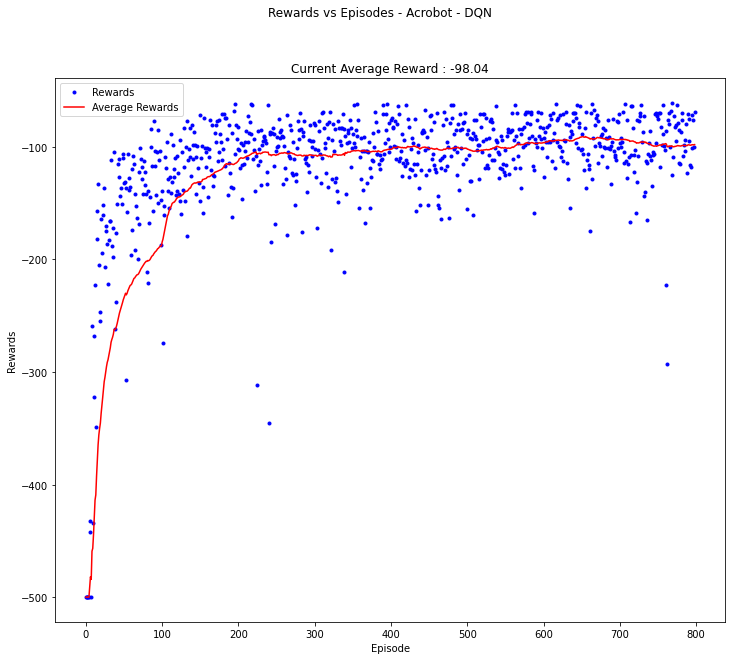

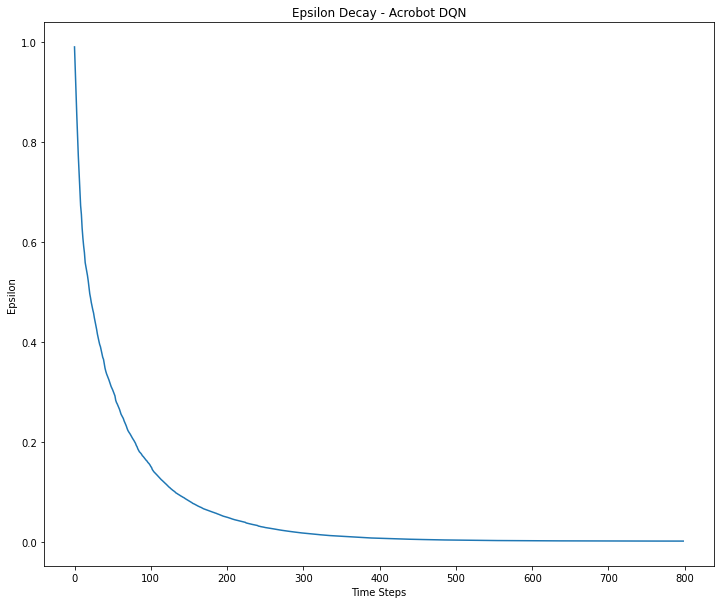

In [36]:

env = gym.make('Acrobot-v1')

dqnAcrobot = DQN(
    envInfo=EnvInfo(env),
    hyperparams=Hyperparams(
        epsilon=0.99,
        epsilonMin=0.001,
        epsilonDecay=10000,
        memorySize=5000,
        learningRate=1e-3,
        batchSize=256,
        discountFactor=0.999,
        targetNetworkUpdateFrequency=20,
        episodes=800
    ),
    nnModel=NeuralNetworkForAcrobot,
    options = Options(
        resultsPath='./results',
        filePrefix='Acrobot',
        showLiveResults=True,
        logResults = False,
        saveModels = True,
        debug = False
    )
)

dqnAcrobot.train()


In [45]:
dqnAcrobot.saveResults()
dqnAcrobot.saveModels()
dqnAcrobot.saveWeights()

<Figure size 864x720 with 0 Axes>

--------------------------------------------------------------------------------

Episode 0                         
Current Reward -86.0 
--------------------------------------------------------------------------------

Episode 1                         
Current Reward -95.0 
--------------------------------------------------------------------------------

Episode 2                         
Current Reward -88.0 
--------------------------------------------------------------------------------

Episode 3                         
Current Reward -92.0 
--------------------------------------------------------------------------------

Episode 4                         
Current Reward -83.0 


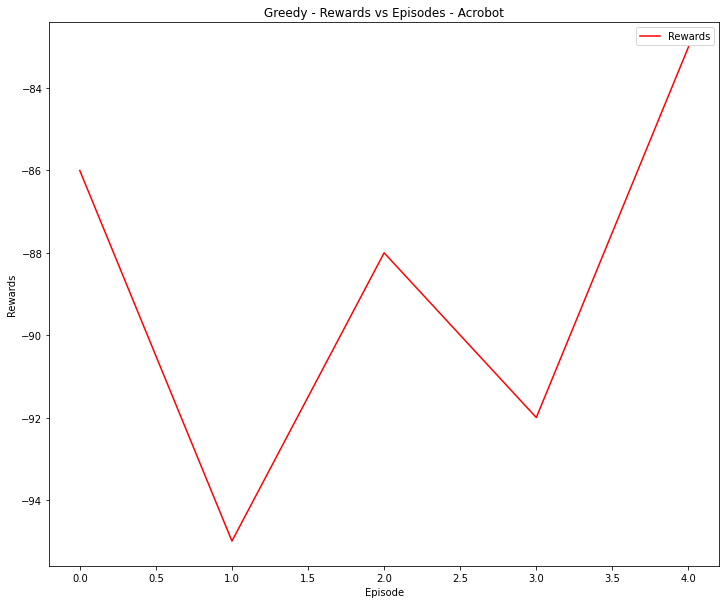

In [44]:
dqnAcrobot.greedy(timeSteps = 5)

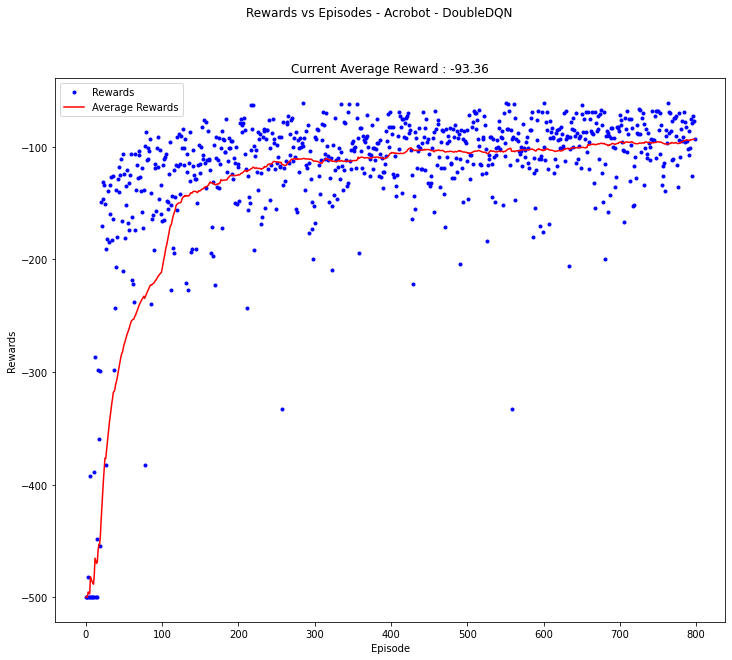

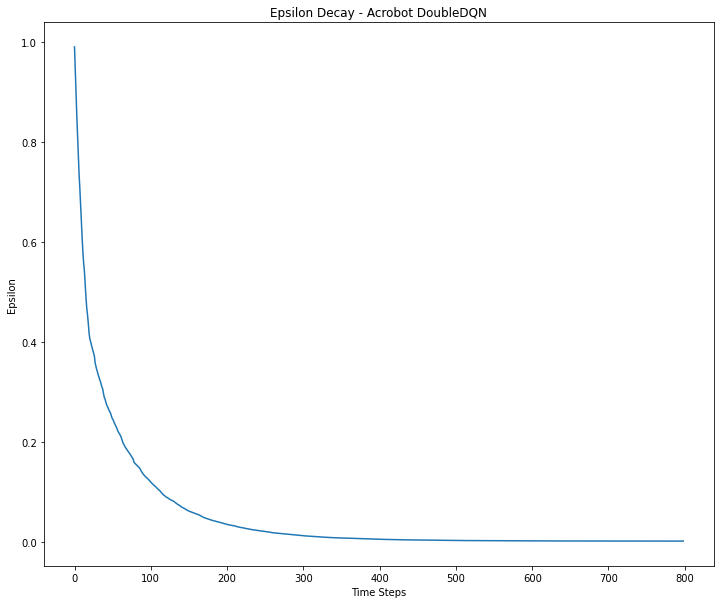

In [4]:
class NeuralNetworkForAcrobot(nn.Module):
    def __init__(self, observation_space, action_space, learningRate):
        super().__init__()
        self.layer_1 = nn.Linear(observation_space, 256)
        self.layer_2 = nn.Linear(256,512)
        self.layer_3 = nn.Linear(512, action_space)
        self.optimizer = optim.Adam(self.parameters(), lr=learningRate)
        self.loss = nn.MSELoss()
        self.to(device)

    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        return self.layer_3(x)


env = gym.make('Acrobot-v1')

doubledqnAcrobot = DoubleDQN(
    envInfo=EnvInfo(env),
    hyperparams=Hyperparams(
        epsilon=0.99,
        epsilonMin=0.001,
        epsilonDecay=10000,
        memorySize=5000,
        learningRate=1e-3,
        batchSize=64,
        discountFactor=0.99,
        targetNetworkUpdateFrequency=20,
        episodes=800,
        tau=0.03
    ),
    nnModel=NeuralNetworkForAcrobot,
    options = Options(
        resultsPath='./results',
        filePrefix='Acrobot',
        showLiveResults=True,
        logResults = False,
        saveModels = True,
        debug = False
    )
)

doubledqnAcrobot.train()


In [5]:
doubledqnAcrobot.saveResults()
doubledqnAcrobot.saveModels()
doubledqnAcrobot.saveWeights()

<Figure size 864x720 with 0 Axes>

--------------------------------------------------------------------------------

Episode 0                         
Current Reward -83.0 
--------------------------------------------------------------------------------

Episode 1                         
Current Reward -68.0 
--------------------------------------------------------------------------------

Episode 2                         
Current Reward -68.0 
--------------------------------------------------------------------------------

Episode 3                         
Current Reward -62.0 
--------------------------------------------------------------------------------

Episode 4                         
Current Reward -92.0 


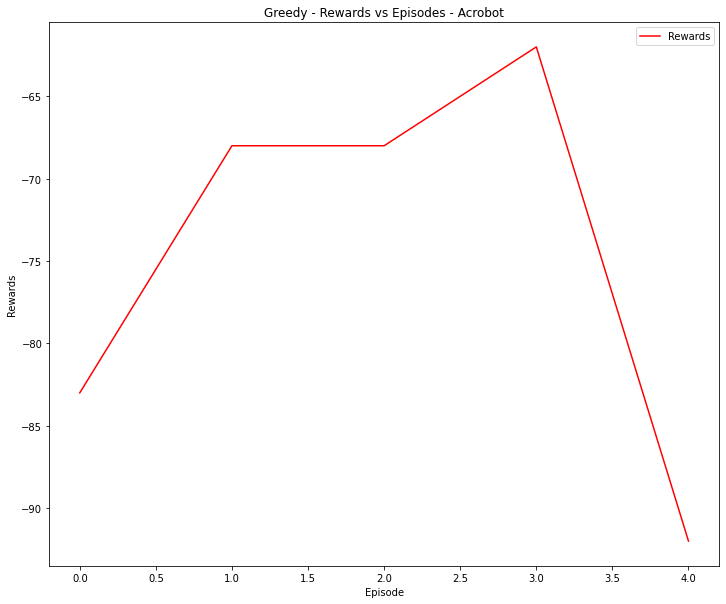

In [21]:
doubledqnAcrobot.greedy(timeSteps = 5)